In [ ]:
!pip install matplotlib_inline

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)

In [4]:
# Load dataset with venue information
nyc_health_borough = pd.read_csv('/content/drive/MyDrive/LHL-Midterm/csv/nyc_health_borough.csv')
nyc_health_borough.head(3)

,Unnamed: 0,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294


In [17]:
# Group venues by neighborhood 
nyc_health_nbh = nyc_health_borough.groupby('Neighborhood', as_index=False).agg(
    {'Venue': 'count', 'Latitude_y': 'first', 'Longitude_y': 'first'})
nyc_health_nbh.head(3)

,Neighborhood,Venue,Latitude_y,Longitude_y
0,Allerton,17,40.865788,-73.859319
1,Annadale,4,40.538114,-74.178549
2,Arden Heights,4,40.549286,-74.185887


In [18]:
# Load dataset with median rent prices
rent = pd.read_csv('df_combined.csv')
rent.head(3)

,Neighborhood,studio,1_bedroom,2_bedroom
0,Allerton,1850.00,1400.0,1800
1,Arden Heights,1473.55,1650.0,2250
2,Astoria,1575.00,1875.0,2200


In [9]:
# Merge both dataframes on neighborhood
rent_health = pd.merge(nyc_health_nbh, rent, on='Neighborhood', how='inner')

# Change some of the features
rent_health.rename(columns={'Venue': 'Venue Counts'}, inplace=True)
rent_health['avg_rent'] = rent_health[['studio', '1_bedroom', '2_bedroom']].mean(axis=1)

rent_health.head(3)

,Neighborhood,Venue Counts,Latitude_y,Longitude_y,studio,1_bedroom,2_bedroom,avg_rent
0,Allerton,17,40.865788,-73.859319,1850.00,1400.0,1800,1683.333333
1,Arden Heights,4,40.549286,-74.185887,1473.55,1650.0,2250,1791.183333
2,Astoria,90,40.768509,-73.915654,1575.00,1875.0,2200,1883.333333


In [10]:
# Drop categorical data and coordinates
num_only = rent_health.drop(['Neighborhood', 'Latitude_y', 'Longitude_y'], axis=1)
num_only.head(3)

,Venue Counts,studio,1_bedroom,2_bedroom,avg_rent
0,17,1850.00,1400.0,1800,1683.333333
1,4,1473.55,1650.0,2250,1791.183333
2,90,1575.00,1875.0,2200,1883.333333


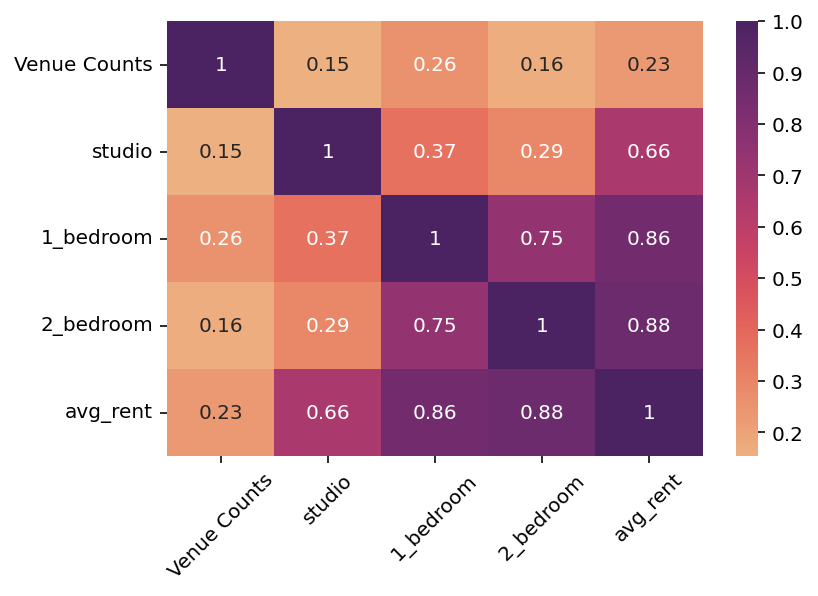

In [11]:
# Generate correlation matrix and plot the result
corr_matrix = num_only.corr()
sns.heatmap(corr_matrix, cmap='flare', annot=True)
plt.xticks(rotation=45)
plt.show()

In [19]:
# Load dataset with average house prices
avg_rent = pd.read_csv('nyc_housing_avg_prices_treated.csv')
avg_rent.head(3)

,Borough,Neighborhood,Studio,1_bedroom,2_bedroom,3_bedroom,Avg_Rent
0,Manhattan,"Chelsea, Manhattan",2794,4062,6997,11031,6221.00
1,Manhattan,East Village,2608,3280,4044,5289,3805.25
2,Manhattan,Flatiron,3632,4645,8267,15969,8128.25


In [24]:
# Merge both dataframes on neighborhood
avg_rent_health = pd.merge(nyc_health_nbh, avg_rent, on='Neighborhood', how='inner')

# Change some of the features
avg_rent_health.rename(columns={'Venue': 'Venue Counts'}, inplace=True)
avg_rent_health.head()

,Neighborhood,Venue Counts,Latitude_y,Longitude_y,Borough,Studio,1_bedroom,2_bedroom,3_bedroom,Avg_Rent
0,Battery Park City,67,40.711932,-74.016869,Manhattan,2823,3573,6859,10574,5957.25
1,Boerum Hill,85,40.685683,-73.983748,Brooklyn,2092,2854,4356,4921,3555.75
2,Brooklyn Heights,79,40.695864,-73.993782,Brooklyn,2509,3270,5983,8654,5104.00
3,Bushwick,28,40.698116,-73.925258,Brooklyn,2050,2373,2749,2851,2505.75
4,Carnegie Hill,60,40.782683,-73.953256,Manhattan,2307,3266,5547,11529,5662.25


In [25]:
# Drop categorical data and coordinates
num_only = avg_rent_health.drop(['Neighborhood', 'Latitude_y', 'Longitude_y', 'Borough'], axis=1)
num_only.head(3)

,Venue Counts,Studio,1_bedroom,2_bedroom,3_bedroom,Avg_Rent
0,67,2823,3573,6859,10574,5957.25
1,85,2092,2854,4356,4921,3555.75
2,79,2509,3270,5983,8654,5104.00


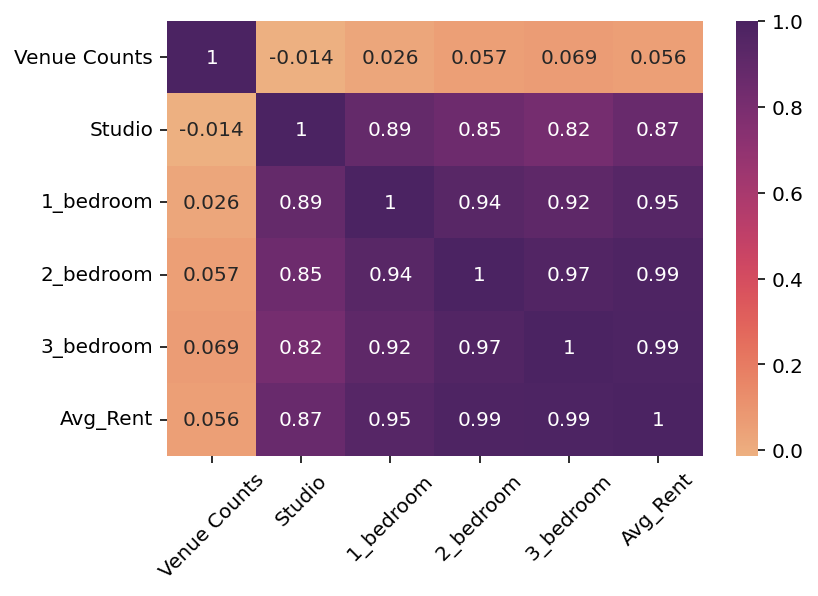

In [26]:
# Generate correlation matrix and plot the result
corr_matrix = num_only.corr()
sns.heatmap(corr_matrix, cmap='flare', annot=True)
plt.xticks(rotation=45)
plt.show()